<a href="https://colab.research.google.com/github/McNealFielies/McNealFielies.github.io/blob/main/Spam_Mail.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

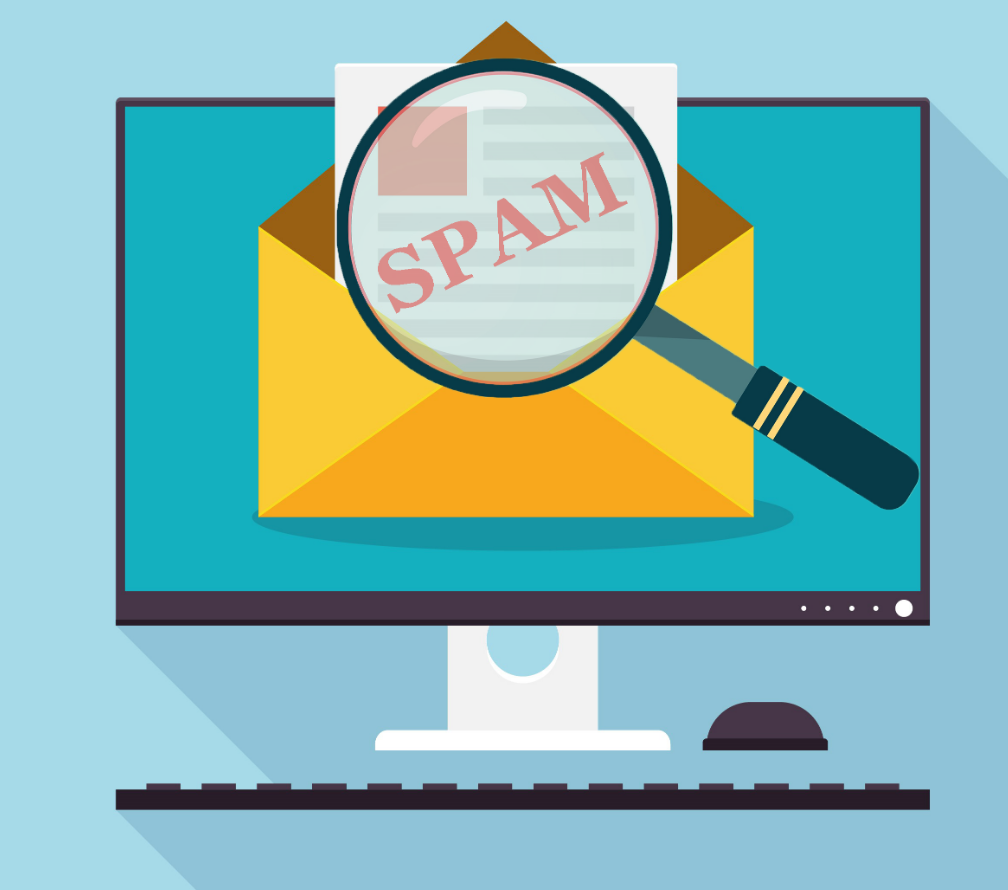

# **Introduction**


In this project, the goal is to develop a spam prediction system using Python and the XGBRegressor algorithm. The project involves various stages such as data preprocessing, model training, evaluation, and building a predictive system. The aim is to accurately classify emails as either spam or non-spam, providing a useful tool for email filtering and enhancing user experience.

Importing the libieries

In [129]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost.sklearn import XGBRegressor
from sklearn import metrics
import matplotlib.pyplot as plt

In [83]:
df = pd.read_csv('/content/spam.csv')

In [84]:
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [85]:
df.isnull().sum()

Category    0
Message     0
dtype: int64

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [87]:
df['Category'].value_counts()

ham     4825
spam     747
Name: Category, dtype: int64

In [88]:
df.loc[df['Category'] == 'spam', 'Category',] = 0
df.loc[df['Category'] == 'ham', 'Category',] = 1

0 -----> spam

1 -----> ham

# **Splitting the data into Features and Targets**

In [89]:
X = df['Message']
Y = df['Category']

In [90]:
print(Y)

0       1
1       1
2       0
3       1
4       1
       ..
5567    0
5568    1
5569    1
5570    1
5571    1
Name: Category, Length: 5572, dtype: object


In [91]:
print(X)

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                 Will ü b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: Message, Length: 5572, dtype: object


# **Splitting the Data into Training and Testing Data**

In [92]:
X_train, X_test,Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=2)

In [93]:
print(X.shape, X_train.shape,X_test.shape)

(5572,) (4457,) (1115,)


# **Feature Extraction**

In [94]:
from sklearn.feature_extraction.text import TfidfVectorizer

feature_extraction = TfidfVectorizer(min_df=1, stop_words='english', lowercase=True)

# Fit the vectorizer on the training data and transform it
X_train_features = feature_extraction.fit_transform(X_train)

# Transform the test data using the same vectorizer
X_test_features = feature_extraction.transform(X_test)

# Converting Y_train and Y_test values to integers
Y_train = Y_train.astype('int')
Y_test = Y_test.astype('int')

# **Model Training**

# **XGBRegressor**

In [119]:
model = XGBRegressor()

In [120]:
model.fit(X_train_features, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

# **Model Evaluation**

In [121]:
training_data_prediction = model.predict(X_train_features)

In [122]:

# R Square Error

score_1 = metrics.r2_score(Y_train, training_data_prediction)

# Mean Absolute Error

score_2 = metrics.mean_absolute_error(Y_train, training_data_prediction)

print("The R Square Error :", score_1)
print("The Mean Absolute Error :", score_2)


The R Square Error : 0.9830439764285154
The Mean Absolute Error : 0.016847903618017756


In [123]:
test_data_prediction = model.predict(X_test_features)

In [124]:
print(test_data_prediction)

[0.9969984  0.9969984  0.9969984  ... 0.9969984  0.9969984  0.02677271]


In [125]:
# R Square Error

score_3 = metrics.r2_score(Y_train, training_data_prediction)

# Mean Absolute Error

score_4 = metrics.mean_absolute_error(Y_train, training_data_prediction)

print("The R Square Error :", score_3)
print("The Mean Absolute Error :", score_4)

The R Square Error : 0.9830439764285154
The Mean Absolute Error : 0.016847903618017756


# **Building a Predictive System**

In [128]:

mail_input = ["SIX chances to win CASH! From 100 to 20,000 pounds txt> CSH11 and send to 87575. Cost 150p/day, 6days, 16+ TsandCs apply Reply HL 4 info"]

mail_input_features = feature_extraction.transform(mail_input)

prediction_mail = model.predict(mail_input_features)

print(prediction_mail)

if prediction_mail[0] == 1:
    print('Ham Mail')
else:
    print('Spam Mail')

[0.00355181]
Spam Mail
